<a href="https://colab.research.google.com/github/Zanyata/Real_estate/blob/main/Real_estate_20240224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' This dataset is obtained by scraping data from otodom.pl from Wroclaw city,  flats only, October'23. '''

#Import

In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from yellowbrick.target import ClassBalance
from pandas.plotting import scatter_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.svm import SVR

from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import regularizers
import keras.backend as K
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


#CSV read

In [100]:
# load dataset
df = pd.read_csv("otodom_wroclaw.csv")

In [3]:
df

,Unnamed: 0,url,price,price_m2,rooms,area,location1,location2,market
0,0,https://www.otodom.pl/pl/oferta/okolice-ul-j-n...,600000.0,8869.0,3,67.65,Stare Miasto,Stare Miasto,secondary
1,1,https://www.otodom.pl/pl/oferta/1-pokojowe-mie...,359040.0,12800.0,1,28.05,Psie Pole,Poświętne,primary
2,2,https://www.otodom.pl/pl/oferta/sloneczne-mies...,880147.0,12379.0,3,71.10,Stare Miasto,Szczepin,primary
3,3,https://www.otodom.pl/pl/oferta/mieszkanie-z-d...,689000.0,11678.0,3,59.00,Śródmieście,Szczytniki,secondary
4,4,https://www.otodom.pl/pl/oferta/3-pokoje-l-wyj...,1149200.0,14855.0,3,77.36,Stare Miasto,Stare Miasto,primary
...,...,...,...,...,...,...,...,...,...
7420,7420,https://www.otodom.pl/pl/oferta/ksieze-wielkie...,999540.0,11800.0,5,84.71,Krzyki,Księże,primary
7421,7421,https://www.otodom.pl/pl/oferta/z-widokiem-na-...,595200.0,16991.0,2,35.03,Śródmieście,Plac Grunwaldzki,primary
7422,7422,https://www.otodom.pl/pl/oferta/nowa-nizsza-ce...,898000.0,7595.0,4,118.24,Krzyki,Ołtaszyn,primary
7423,7423,https://www.otodom.pl/pl/oferta/ul-grunwaldzka...,620000.0,10131.0,3,61.20,Śródmieście,Plac Grunwaldzki,secondary


#EDA

#Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7425 non-null   int64  
 1   url         7425 non-null   object 
 2   price       7425 non-null   float64
 3   price_m2    7425 non-null   float64
 4   rooms       7425 non-null   int64  
 5   area        7425 non-null   float64
 6   location1   7425 non-null   object 
 7   location2   7425 non-null   object 
 8   market      7425 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 522.2+ KB


In [5]:
df.isna().sum()

Unnamed: 0    0
url           0
price         0
price_m2      0
rooms         0
area          0
location1     0
location2     0
market        0
dtype: int64

In [6]:
df['url'].duplicated().sum()

0

In [101]:
df = df.drop(columns=['Unnamed: 0', 'url', 'location2', "price_m2"])

In [8]:
df.describe()

,price,rooms,area
count,7.425000e+03,7425.000000,7425.000000
mean,7.442017e+05,2.689832,61.503439
std,3.949030e+05,0.990165,139.055931
min,9.156600e+04,1.000000,13.410000
25%,5.490000e+05,2.000000,44.670000
50%,6.719900e+05,3.000000,56.530000
75%,8.290000e+05,3.000000,70.000000
max,9.500000e+06,9.000000,11836.000000


In [16]:
''' Data is free from duplicates and Na values, unnedessary rows deleted
7425 rows × 5 columns '''

' Data is free from duplicates and Na values\n7425 rows × 5 columns '

#Correlation deep dive

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,rooms,area
price,1.000000,0.452513,0.147443
rooms,0.452513,1.000000,0.144328
area,0.147443,0.144328,1.000000


In [18]:
''' Strangely there is a higher correlation between price & rooms than price & area
Data clearly needs more investigation '''

' Strangely there is a higher correlation between price & rooms than price & area\nData clearly needs more investigation '

In [19]:
''' Let's try to remove outliers. '''

" Let's try to remove outliers. "

In [102]:
# removing area outliers

area_95p = df['area'].quantile(0.95)
area_05p = df['area'].quantile(0.05)
df_no_outl = df[(df['area'] <= area_95p) & (df['area'] >= area_05p)]
df_no_outl.reset_index(drop=True, inplace=True)

In [103]:
# removing price outliers

area_95p = df['price'].quantile(0.95)
area_05p = df['price'].quantile(0.05)
df_no_outl = df_no_outl[(df_no_outl['price'] <= area_95p) & (df['price'] >= area_05p)]

df_no_outl.reset_index(drop=True, inplace=True)
df_no_outl.sample(3)

<ipython-input-103-9bf71df6ff8e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outl = df_no_outl[(df_no_outl['price'] <= area_95p) & (df['price'] >= area_05p)]


,price,rooms,area,location1,market
4576,540000.0,2,44.00,Psie Pole,primary
3209,678845.0,3,59.03,Krzyki,primary
3683,528850.0,4,59.70,Krzyki,primary


In [12]:
print(df.corr())
print("/n")

print(df_no_outl.corr())

          price     rooms      area
price  1.000000  0.452513  0.147443
rooms  0.452513  1.000000  0.144328
area   0.147443  0.144328  1.000000
/n
          price     rooms      area
price  1.000000  0.539979  0.694440
rooms  0.539979  1.000000  0.759798
area   0.694440  0.759798  1.000000


<ipython-input-12-8a40a82f3fa4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-12-8a40a82f3fa4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_no_outl.corr())


In [23]:
''' Great improvement with getting the correlation between price and area, 0.14 -> 0.69! '''

' Great improvement with getting the correlation between price and area, 0.14 -> 0.69! '

In [13]:
# creating new dataframe for experimenting with attribute combinations
df_no_outl_corr = df_no_outl.copy()

In [14]:
# creating new feature that takes into account households quantity per location

df_no_outl_corr.insert(loc=5, column="households_qty_per_location", value = df_no_outl_corr["location1"], allow_duplicates=True)

krzyki_sum = (df_no_outl_corr['location1']=="Krzyki").sum()
psiepole_sum = (df_no_outl_corr['location1']=="Psie Pole").sum()
fabryczna_sum = (df_no_outl_corr['location1']=="Fabryczna").sum()
staremiasto_sum = (df_no_outl_corr['location1']=="Stare Miasto").sum()
srodmiescie_sum = (df_no_outl_corr['location1']=="Śródmieście").sum()


dict_map = {"Krzyki":krzyki_sum, "Psie Pole":psiepole_sum, "Fabryczna":fabryczna_sum, "Stare Miasto":staremiasto_sum, "Śródmieście":srodmiescie_sum}
df_no_outl_corr['households_qty_per_location'].replace(dict_map, inplace=True)

df_no_outl_corr['households_qty_per_location'] = pd.to_numeric(df_no_outl_corr['households_qty_per_location'])
df_no_outl_corr['rooms_per_households_qty'] = (df_no_outl_corr['rooms'] / df_no_outl_corr['households_qty_per_location'])*100
df_no_outl_corr['rooms_per_households_qty'] = (df_no_outl_corr['rooms'] / df_no_outl_corr['households_qty_per_location'])*100

In [15]:
# creating new feature that takes into account primary market availability per location

# Calculate total quantity of each category in location1
total_quantity = df_no_outl_corr.groupby('location1').size()

# Calculate sum of 'primary' for each category in location1
primary_sum = df_no_outl_corr[df_no_outl_corr['market'] == 'primary'].groupby('location1').size()

# Divide sum of 'primary' by total quantity for each category
outcome_column = primary_sum / total_quantity

# Create a dictionary mapping location1 categories to corresponding outcome values
outcome_dict = outcome_column.to_dict()

# Map the location1 categories to the corresponding outcome values and create a new column
df_no_outl_corr['market_per_households_qty'] = df_no_outl_corr['location1'].map(outcome_dict)


In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,rooms,area
price,1.000000,0.452513,0.147443
rooms,0.452513,1.000000,0.144328
area,0.147443,0.144328,1.000000


In [17]:
df_no_outl.corr()

<ipython-input-17-6bd157293b7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outl.corr()


,price,rooms,area
price,1.000000,0.539979,0.694440
rooms,0.539979,1.000000,0.759798
area,0.694440,0.759798,1.000000


In [18]:
df_no_outl_corr.corr()

<ipython-input-18-3944ad8724df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outl_corr.corr()


,price,rooms,area,households_qty_per_location,rooms_per_households_qty,market_per_households_qty
price,1.000000,0.539979,0.694440,-0.091554,0.503833,-0.065029
rooms,0.539979,1.000000,0.759798,0.088953,0.745481,0.080077
area,0.694440,0.759798,1.000000,0.031130,0.590169,-0.025358
households_qty_per_location,-0.091554,0.088953,0.031130,1.000000,-0.542111,0.276819
rooms_per_households_qty,0.503833,0.745481,0.590169,-0.542111,1.000000,-0.197443
market_per_households_qty,-0.065029,0.080077,-0.025358,0.276819,-0.197443,1.000000


In [33]:
''' No major correlation found by attribute combination, but let's see how it will translate to model results. '''

" No major correlation found by attribute combination, but let's see how it will translate to model results. "

#Saving datasets

In [83]:
df_no_outl.to_csv('df_no_outl.csv')

In [84]:
df_no_outl_corr.to_csv('df_no_outl_corr.csv')

#Data split

##Raw dataset

In [19]:
# df raw dataset

# Changing market categorical values to numerical
dict_map = {"primary":1, "secondary":0}
df['market'].replace(dict_map, inplace=True)
df.sample(3)

# Data scaling, now price in kPLN
df["price"] = df["price"]/1000
df["price"] = df["price"].round(2)



In [104]:
def get_feature_types(df):
    """
    Determine feature types based on the DataFrame columns.

    Args:
    - df (DataFrame): Input DataFrame containing features.

    Returns:
    - numeric_features (list): List of numeric feature column names.
    - categorical_features (list): List of categorical feature column names.
    """
    # Get numeric features (integers and floats)
    numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()

    # Get categorical features (objects)
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    # Exclude 'price' and 'market' from numeric features
    numeric_features = [feature for feature in numeric_features if feature not in ['price', 'market']]

    # Exclude 'price' and 'market' from categorical features
    categorical_features = [feature for feature in categorical_features if feature not in ['price', 'market']]

    return numeric_features, categorical_features


def preprocess_data(df):
    """
    Preprocess the data using appropriate transformations for numeric, categorical, and passthrough features.

    Args:
    - df (DataFrame): Input DataFrame containing features.

    Returns:
    - preprocessor (ColumnTransformer): Preprocessor object for transforming features.
    """
    # Get numeric and categorical features
    numeric_features, categorical_features = get_feature_types(df)

    # Define passthrough features (features that will not be transformed)
    passthrough_features = ['market', 'price']

    # Initialize StandardScaler for numeric features and OneHotEncoder for categorical features
    sc = StandardScaler()
    ohe = OneHotEncoder(handle_unknown='ignore')

    # Define ColumnTransformer to apply transformations to different feature types
    preprocessor = ColumnTransformer(
        transformers=[
            ('sc', sc, numeric_features),           # Apply StandardScaler to numeric features
            ('ohe', ohe, categorical_features),    # Apply OneHotEncoder to categorical features
            ('passthrough', 'passthrough', passthrough_features)  # Pass through passthrough features
        ]
    )

    return preprocessor


In [21]:
# perform data processing (standard scaler, ohe)

preprocessor=preprocess_data(df)
df_set = preprocessor.fit_transform(df)
df_set = pd.DataFrame(df_set, columns=preprocessor.get_feature_names_out())

In [22]:
df_set.sample(3)

,sc__rooms,sc__area,ohe__location1_Fabryczna,ohe__location1_Krzyki,ohe__location1_Psie Pole,ohe__location1_Stare Miasto,ohe__location1_Śródmieście,passthrough__market,passthrough__price
7399,-0.696731,-0.125882,0.0,0.0,1.0,0.0,0.0,0.0,563.00
7253,1.323271,-0.161194,0.0,1.0,0.0,0.0,0.0,1.0,449.54
289,0.313270,-0.004196,0.0,1.0,0.0,0.0,0.0,1.0,632.96


In [23]:
# creating sets for models inputs

X = df_set.drop(columns=['passthrough__price']).values
y = df_set['passthrough__price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##No outliers dataset

In [105]:
# Copying the dataset to create a version without outliers
df = df_no_outl.copy()

# Changing categorical values in the 'market' column to numerical
dict_map = {"primary": 1, "secondary": 0}  # Mapping dictionary
df['market'].replace(dict_map, inplace=True)  # Replacing categorical values with numerical values

# Scaling the 'price' column (now in kPLN) and rounding it to two decimal places
df["price"] = df["price"] / 1000
df["price"] = df["price"].round(2)

# Creating an additional column 'price_attribute' for stratification purposes
# This column is created based on percentiles of the 'price' column
df.insert(loc=1, column="price_attribute", value=df["price"], allow_duplicates=True)
percentiles = np.percentile(df["price_attribute"], [0, 25, 50, 75, 100])
df["price_attribute"] = pd.cut(df["price_attribute"], bins=percentiles, labels=[1, 2, 3, 4], include_lowest=True)

# Stratified split of the dataset into training, validation, and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["price_attribute"]):
    strat_train_set_no_outl = df.loc[train_index]
    strat_test_set_no_outl = df.loc[test_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(strat_train_set_no_outl, strat_train_set_no_outl["price_attribute"]):
    strat_train_set_no_outl = df.loc[train_index]
    strat_val_set_no_outl = df.loc[test_index]

# Deleting the 'price_attribute' column after stratified split
for set_ in (strat_train_set_no_outl, strat_val_set_no_outl, strat_test_set_no_outl):
    set_.drop("price_attribute", axis=1, inplace=True)


In [106]:
# perform data processing (standard scaler, ohe)

preprocessor=preprocess_data(df_no_outl)

strat_train_set_no_outl = preprocessor.fit_transform(strat_train_set_no_outl)
strat_train_set_no_outl = pd.DataFrame(strat_train_set_no_outl, columns=preprocessor.get_feature_names_out())

strat_val_set_no_outl = preprocessor.fit_transform(strat_val_set_no_outl)
strat_val_set_no_outl = pd.DataFrame(strat_val_set_no_outl, columns=preprocessor.get_feature_names_out())

strat_test_set_no_outl = preprocessor.fit_transform(strat_test_set_no_outl)
strat_test_set_no_outl = pd.DataFrame(strat_test_set_no_outl, columns=preprocessor.get_feature_names_out())

In [107]:
# Extracting features and labels for the training set without outliers
X_train_no_outl = strat_train_set_no_outl.drop(columns=['passthrough__price']).values  # Features (excluding 'price')
y_train_no_outl = strat_train_set_no_outl['passthrough__price'].values  # Target variable ('price')

# Extracting features and labels for the validation set without outliers
X_val_no_outl = strat_val_set_no_outl.drop(columns=['passthrough__price']).values  # Features (excluding 'price')
y_val_no_outl = strat_val_set_no_outl['passthrough__price'].values  # Target variable ('price')

# Extracting features and labels for the test set without outliers
X_test_no_outl = strat_test_set_no_outl.drop(columns=['passthrough__price']).values  # Features (excluding 'price')
y_test_no_outl = strat_test_set_no_outl['passthrough__price'].values  # Target variable ('price')


##No outliers with additional correlation dataset

In [27]:
# Copying the dataset to create a version without outliers and with additional correlation features
df = df_no_outl_corr.copy()

# Changing categorical values in the 'market' column to numerical
dict_map = {"primary":1, "secondary":0}
df['market'].replace(dict_map, inplace=True)
df.sample(3)  # Displaying a sample of 3 rows from the DataFrame

# Scaling the 'price' column data to represent prices in kPLN (thousands of PLN)
df["price"] = df["price"]/1000
df["price"] = df["price"].round(2)  # Rounding the 'price' values to 2 decimal places

# Creating an additional column for stratification purposes based on price percentiles
df.insert(loc=1, column="price_attribute", value=df["price"], allow_duplicates=True)
percentiles = np.percentile(df["price_attribute"], [0, 25, 50, 75, 100])
df["price_attribute"] = pd.cut(df["price_attribute"], bins=percentiles, labels=[1, 2, 3, 4], include_lowest=True)

# Performing a stratified split to create training, validation, and test sets without outliers and with correlation features
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["price_attribute"]):
  strat_train_set_no_outl_corr = df.loc[train_index]
  strat_test_set_no_outl_corr = df.loc[test_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(strat_train_set_no_outl_corr, strat_train_set_no_outl_corr["price_attribute"]):
  strat_train_set_no_outl_corr = df.loc[train_index]
  strat_val_set_no_outl_corr = df.loc[test_index]

# Removing the 'price_attribute' column after stratified split
for set_ in (strat_train_set_no_outl_corr, strat_val_set_no_outl_corr, strat_test_set_no_outl_corr):
  set_.drop("price_attribute", axis=1, inplace=True)


In [28]:
# perform data processing (standard scaler, ohe)

preprocessor=preprocess_data(df_no_outl_corr)

strat_train_set_no_outl_corr = preprocessor.fit_transform(strat_train_set_no_outl_corr)
strat_train_set_no_outl_corr = pd.DataFrame(strat_train_set_no_outl_corr, columns=preprocessor.get_feature_names_out())

strat_val_set_no_outl_corr = preprocessor.fit_transform(strat_val_set_no_outl_corr)
strat_val_set_no_outl_corr = pd.DataFrame(strat_val_set_no_outl_corr, columns=preprocessor.get_feature_names_out())

strat_test_set_no_outl_corr = preprocessor.fit_transform(strat_test_set_no_outl_corr)
strat_test_set_no_outl_corr = pd.DataFrame(strat_test_set_no_outl_corr, columns=preprocessor.get_feature_names_out())

In [29]:
# Extracting features and target variables for the training set without outliers and with correlation features
X_train_no_outl_corr = strat_train_set_no_outl_corr.drop(columns=['passthrough__price']).values
y_train_no_outl_corr = strat_train_set_no_outl_corr['passthrough__price'].values

# Extracting features and target variables for the validation set without outliers and with correlation features
X_val_no_outl_corr = strat_val_set_no_outl_corr.drop(columns=['passthrough__price']).values
y_val_no_outl_corr = strat_val_set_no_outl_corr['passthrough__price'].values

# Extracting features and target variables for the test set without outliers and with correlation features
X_test_no_outl_corr = strat_test_set_no_outl_corr.drop(columns=['passthrough__price']).values
y_test_no_outl_corr = strat_test_set_no_outl_corr['passthrough__price'].values


#Data split - train test - for ML part

In [30]:
# Concatenate X_train and X_val along axis 0
X_train_no_outl = np.concatenate((X_train_no_outl, X_val_no_outl), axis=0)

# Concatenate y_train and y_val along axis 0
y_train_no_outl = np.concatenate((y_train_no_outl, y_val_no_outl), axis=0)


In [31]:
# Concatenate X_train and X_val along axis 0
X_train_no_outl_corr = np.concatenate((X_train_no_outl_corr, X_val_no_outl_corr), axis=0)

# Concatenate y_train and y_val along axis 0
y_train_no_outl_corr = np.concatenate((y_train_no_outl_corr, y_val_no_outl_corr), axis=0)


#ML

##Linear Regression

In [34]:
def linear_regression():
    """
    Perform linear regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_lr (dict): Best hyperparameters found for the linear regression model.
    lr_best (LinearRegression): Linear regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid
    params_lr = {
        'fit_intercept': [True, False],
        'n_jobs': [-1, 1, 2, 3],
        'positive': [True, False]
    }

    # Initialize the LinearRegression model
    lr = LinearRegression()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_lr = GridSearchCV(
        estimator=lr,
        param_grid=params_lr,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_lr.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_lr = grid_cv_model_lr.best_params_

    # Initialize LinearRegression with the best hyperparameters
    lr_best = LinearRegression(**best_params_lr)

    # Fit LinearRegression model on the training data
    lr_best.fit(X_train, y_train)

    return best_params_lr, lr_best


##LASSO

In [37]:
def lasso():
    """
    Perform Lasso regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_lasso (dict): Best hyperparameters found for the Lasso model.
    lasso_best (Lasso): Lasso regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid for Lasso
    params_lasso = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 100],
        'fit_intercept': [True, False],
        'max_iter': [1, 5, 10, 50, 100, 150, 200, 250]
    }

    # Initialize the Lasso model
    lasso = Lasso()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_lasso = GridSearchCV(
        estimator=lasso,
        param_grid=params_lasso,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_lasso.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_lasso = grid_cv_model_lasso.best_params_

    # Initialize Lasso with the best hyperparameters
    lasso_best = Lasso(**best_params_lasso)

    # Fit Lasso model on the training data
    lasso_best.fit(X_train, y_train)

    return best_params_lasso, lasso_best


##RIDGE

In [40]:
def ridge():
    """
    Perform Ridge regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_ridge (dict): Best hyperparameters found for the Ridge model.
    ridge_best (Ridge): Ridge regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid for Ridge
    params_ridge = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 100, 200],
        'fit_intercept': [True, False],
        'max_iter': [1, 5, 10, 50, 100, 150, 200, 250]
    }

    # Initialize the Ridge model
    ridge = Ridge()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_ridge = GridSearchCV(
        estimator=ridge,
        param_grid=params_ridge,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_ridge.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_ridge = grid_cv_model_ridge.best_params_

    # Initialize Ridge with the best hyperparameters
    ridge_best = Ridge(**best_params_ridge)

    # Fit Ridge model on the training data
    ridge_best.fit(X_train, y_train)

    return best_params_ridge, ridge_best


##Polynomial regression

In [43]:
def polynomial_regression():
    """
    Perform polynomial regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_poly (dict): Best hyperparameters found for the polynomial regression.
    poly_lr_pipeline_best (Pipeline): Pipeline with the best hyperparameters.
    """

    # Define the pipeline
    poly_lr_pipeline = Pipeline([
        ('poly', PolynomialFeatures()),
        ('lr', LinearRegression())
    ])

    # Define the parameter grid
    param_grid = {
        'poly__degree': [2, 3]  # Try different degrees for polynomial features
    }

    # Perform grid search
    grid_cv_model_poly = GridSearchCV(
        poly_lr_pipeline,
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        return_train_score=True,
        verbose=1
    )
    grid_cv_model_poly.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_poly = grid_cv_model_poly.best_params_

    # Initialize Pipeline with the best hyperparameters
    poly_lr_pipeline_best = Pipeline([
        ('poly_features', PolynomialFeatures(degree=best_params_poly['poly__degree'])),
        ('linear_regression', LinearRegression())
    ])

    poly_lr_pipeline_best.fit(X_train, y_train)

    return best_params_poly, poly_lr_pipeline_best


##ElasticNet

In [46]:
def elastic_net():
    """
    Perform ElasticNet regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_elastic (dict): Best hyperparameters found for the ElasticNet regression.
    elastic_net_best (ElasticNet): ElasticNet model with the best hyperparameters.
    """

    # Define the hyperparameter grid for alpha and l1_ratio
    params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.1, 1.2]}

    # Initialize the ElasticNet model
    elastic_net = ElasticNet()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_elastic = GridSearchCV(
        estimator=elastic_net,
        param_grid=params,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_elastic.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_elastic = grid_cv_model_elastic.best_params_

    # Initialize ElasticNet with the best hyperparameters
    elastic_net_best = ElasticNet(**best_params_elastic)

    # Fit ElasticNet model on the training data
    elastic_net_best.fit(X_train, y_train)

    return best_params_elastic, elastic_net_best


##Gradient Boosting Machines (GBM)

In [49]:
def gbm():
    """
    Perform Gradient Boosting Regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_gbm (dict): Best hyperparameters found for the Gradient Boosting Regression.
    gbm_best (GradientBoostingRegressor): Gradient Boosting Regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid
    params = {'n_estimators': [300],
              'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'max_depth': [5, 10, 15]}

    # Initialize the GradientBoostingRegressor model
    gbm = GradientBoostingRegressor()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_gbm = GridSearchCV(
        estimator=gbm,
        param_grid=params,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_gbm.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_gbm = grid_cv_model_gbm.best_params_

    # Initialize GradientBoostingRegressor with the best hyperparameters
    gbm_best = GradientBoostingRegressor(**best_params_gbm)

    # Fit GBM model on the training data
    gbm_best.fit(X_train, y_train)

    return best_params_gbm, gbm_best


##XGBoost (Extreme Gradient Boosting)

In [52]:
def xgb():
    """
    Perform XGBoost Regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_xgb (dict): Best hyperparameters found for the XGBoost Regression.
    xgb_best (XGBRegressor): XGBoost Regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid
    params = {'n_estimators': [300],
              'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
              'max_depth': [5, 10, 20, 30]}

    # Initialize the XGBoost Regressor model
    xgb = XGBRegressor()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_xgb = GridSearchCV(
        estimator=xgb,
        param_grid=params,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_xgb.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_xgb = grid_cv_model_xgb.best_params_

    # Initialize XGBoost Regressor with the best hyperparameters
    xgb_best = XGBRegressor(**best_params_xgb)

    # Fit XGBoost model on the training data
    xgb_best.fit(X_train, y_train)

    return best_params_xgb, xgb_best


##LightGBM (Light Gradient Boosting Machine)

In [55]:
def lgb():
    """
    Perform LightGBM Regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_lgb (dict): Best hyperparameters found for the LightGBM Regression.
    lgb_best (LGBMRegressor): LightGBM Regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid
    params = {'n_estimators': [300],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [5, 10, 20, 30]}

    # Initialize the LightGBM Regressor model
    lgb = LGBMRegressor()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_lgb = GridSearchCV(
        estimator=lgb,
        param_grid=params,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_lgb.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_lgb = grid_cv_model_lgb.best_params_

    # Initialize LightGBM Regressor with the best hyperparameters
    lgb_best = LGBMRegressor(**best_params_lgb)

    # Fit LightGBM model on the training data
    lgb_best.fit(X_train, y_train)

    return best_params_lgb, lgb_best


##Support Vector Regression (SVR)

In [58]:
def svr():
    """
    Perform Support Vector Regression (SVR) with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_svr (dict): Best hyperparameters found for SVR.
    svr_best (SVR): SVR model with the best hyperparameters.
    """

    # Define the hyperparameter grid
    params = {'kernel': ['linear', 'rbf', 'poly'],
              'C': [10, 50],
              'epsilon': [1, 10, 50]}

    # Initialize the SVR model
    svr = SVR()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_svr = GridSearchCV(
        estimator=svr,
        param_grid=params,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_svr.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_svr = grid_cv_model_svr.best_params_

    # Initialize SVR model with the best hyperparameters
    svr_best = SVR(**best_params_svr)

    # Fit SVR model on the training data
    svr_best.fit(X_train, y_train)

    return best_params_svr, svr_best


## Decision Tree Regressor

In [61]:
def dt():
    """
    Perform Decision Tree Regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_dt (dict): Best hyperparameters found for Decision Tree Regression.
    dt_best (DecisionTreeRegressor): Decision Tree Regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid for max_depth and min_samples_split
    params_dt = {'max_depth': [5, 10, 20, 30],
                 'max_features': [1, 3, 5, 10, 15],
                 'min_samples_split': [5, 10, 20, 30]}

    # Initialize the DecisionTreeRegressor model
    dt = DecisionTreeRegressor()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_dt = GridSearchCV(
        estimator=dt,
        param_grid=params_dt,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_dt.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_dt = grid_cv_model_dt.best_params_

    # Initialize DecisionTreeRegressor with the best hyperparameters
    dt_best = DecisionTreeRegressor(**best_params_dt)

    # Fit Decision Tree model on the training data
    dt_best.fit(X_train, y_train)

    return best_params_dt, dt_best


## Random Forest Regressor

In [64]:
def rf():
    """
    Perform Random Forest Regression with hyperparameter tuning using GridSearchCV.

    Returns:
    best_params_rf (dict): Best hyperparameters found for Random Forest Regression.
    rf_best (RandomForestRegressor): Random Forest Regression model with the best hyperparameters.
    """

    # Define the hyperparameter grid for n_estimators and max_depth
    params_rf = {'n_estimators': [100],
                 'max_features': [1, 3, 5, 10, 15],
                 'max_depth': [25, 50, 100, 150]}

    # Initialize the RandomForestRegressor model
    rf = RandomForestRegressor()

    # Define the number of cross-validation folds
    folds = 5

    # Instantiate GridSearchCV
    grid_cv_model_rf = GridSearchCV(
        estimator=rf,
        param_grid=params_rf,
        scoring='neg_mean_absolute_error',
        cv=folds,
        return_train_score=True,
        verbose=1
    )

    # Fit GridSearchCV with X_train and y_train
    grid_cv_model_rf.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_rf = grid_cv_model_rf.best_params_

    # Initialize RandomForestRegressor with the best hyperparameters
    rf_best = RandomForestRegressor(**best_params_rf)

    # Fit Random Forest model on the training data
    rf_best.fit(X_train, y_train)

    return best_params_rf, rf_best


#ML models comparison

In [65]:
def run_models():
    """
    Run multiple regression models and return their best hyperparameters and predictions.

    Returns:
    best_params (dict): Dictionary containing the best hyperparameters for each model.
    predictions (dict): Dictionary containing RMSE and standard deviation for each model's predictions.
    """

    # Run individual regression models and obtain their best hyperparameters
    best_params_lr, lr_best = linear_regression()
    best_params_lasso, lasso_best = lasso()
    best_params_ridge, ridge_best = ridge()
    best_params_poly, poly_lr_pipeline_best = polynomial_regression()
    best_params_elastic, elastic_net_best = elastic_net()
    best_params_gbm, gbm_best = gbm()
    best_params_xgb, xgb_best = xgb()
    best_params_lgb, lgb_best = lgb()
    best_params_svr, svr_best = svr()
    best_params_dt, dt_best = dt()
    best_params_rf, rf_best = rf()

    # Store the best hyperparameters for each model in a dictionary
    best_params = {
        "Linear Regression": best_params_lr,
        "Lasso": best_params_lasso,
        "Ridge": best_params_ridge,
        "Polynomial Regression": best_params_poly,
        "ElasticNet": best_params_elastic,
        "GBM": best_params_gbm,
        "XGB": best_params_xgb,
        "LGB": best_params_lgb,
        "SVR": best_params_svr,
        "Decision Tree Regressor": best_params_dt,
        "Random Forest Regressor": best_params_rf
    }

    precision = 16  # Precision for displaying RMSE and standard deviation

    # Function to calculate RMSE and standard deviation for predictions
    def calculate_RMSE(model_name, y_test, y_pred):
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        sd = np.std(y_pred - y_test)
        return "RMSE: {:.{}f}, SD: {:.{}f}".format(rmse, precision, sd, precision)

    # Function to generate predictions for each model
    def predictions():
        models = {
            "Linear Regression": lr_best,
            "Lasso": lasso_best,
            "Ridge": ridge_best,
            "Polynomial Regression": poly_lr_pipeline_best,
            "ElasticNet": elastic_net_best,
            "GBM": gbm_best,
            "XGB": xgb_best,
            "LGB": lgb_best,
            "SVR": svr_best,
            "Decision Tree Regressor": dt_best,
            "Random Forest Regressor": rf_best
        }

        results = {}
        for model_name, model in models.items():
            y_pred = model.predict(X_test)
            rmse_sd = calculate_RMSE(model_name, y_test, y_pred)
            rmse, sd = rmse_sd.split(', ')
            results[model_name] = {'RMSE': rmse.split(': ')[1], 'S_Deviation': sd.split(': ')[1]}

        return results

    return best_params, predictions()


In [71]:
# Run the models to obtain their best hyperparameters and predictions
best_params, predictions = run_models()

# Print the best hyperparameters for each model
print(best_params)

# Assuming X_test and y_test are defined somewhere in your code

# Create a DataFrame to display the predictions
# predictions is a dictionary containing RMSE and standard deviation for each model's predictions
# The keys are the model names and the values are dictionaries with 'RMSE' and 'S_Deviation' keys
df_predictions_raw = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['RMSE', 'S_Deviation'])

# Print the DataFrame showing RMSE and standard deviation for each model's predictions
print(df_predictions_raw)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+08, tolerance: 7.751e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+08, tolerance: 7.201e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+08, tolerance: 7.642e

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.864e+08, tolerance: 7.751e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+08, tolerance: 7.201e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.880e+08, tolerance: 7.642e

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [72]:
best_params_raw = best_params
best_params_raw

{'Linear Regression': {'fit_intercept': False, 'n_jobs': -1, 'positive': True},
 'Lasso': {'alpha': 15, 'fit_intercept': False, 'max_iter': 1},
 'Ridge': {'alpha': 200, 'fit_intercept': True, 'max_iter': 1},
 'Polynomial Regression': {'poly__degree': 2},
 'ElasticNet': {'alpha': 1, 'l1_ratio': 0.9},
 'GBM': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300},
 'XGB': {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 300},
 'LGB': {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 300},
 'SVR': {'C': 50, 'epsilon': 10, 'kernel': 'rbf'},
 'Decision Tree Regressor': {'max_depth': 30,
  'max_features': 1,
  'min_samples_split': 5},
 'Random Forest Regressor': {'max_depth': 50,
  'max_features': 5,
  'n_estimators': 100}}

In [73]:
df_predictions_raw

,RMSE,S_Deviation
Linear Regression,305.2407765841214768,305.1978596234196743
Lasso,313.1419186578839344,308.0315098312385089
Ridge,304.2421923417741709,304.2081685047967881
Polynomial Regression,237.3737483904251349,237.3721917246441251
ElasticNet,305.6193333849655573,305.5845825363051631
GBM,252.1897688895896579,252.1627470435508656
XGB,238.3476223282582112,238.2736285305863078
LGB,234.9882856618197025,234.9874730442546138
SVR,269.9240514990663087,267.0404745635014478
Decision Tree Regressor,278.9425458231288530,278.9417882379863727


In [74]:
df_predictions_raw2 = df_predictions_raw.copy()

In [75]:
df_predictions_raw2

,RMSE,S_Deviation
Linear Regression,305.2407765841214768,305.1978596234196743
Lasso,313.1419186578839344,308.0315098312385089
Ridge,304.2421923417741709,304.2081685047967881
Polynomial Regression,237.3737483904251349,237.3721917246441251
ElasticNet,305.6193333849655573,305.5845825363051631
GBM,252.1897688895896579,252.1627470435508656
XGB,238.3476223282582112,238.2736285305863078
LGB,234.9882856618197025,234.9874730442546138
SVR,269.9240514990663087,267.0404745635014478
Decision Tree Regressor,278.9425458231288530,278.9417882379863727


In [77]:
# Add a new column named 'Dataset' with the value 'raw' to the DataFrame df_predictions_raw
df_predictions_raw['Dataset'] = 'raw'

# Display the DataFrame
df_predictions_raw


,RMSE,S_Deviation,Dataset
Linear Regression,305.2407765841214768,305.1978596234196743,raw
Lasso,313.1419186578839344,308.0315098312385089,raw
Ridge,304.2421923417741709,304.2081685047967881,raw
Polynomial Regression,237.3737483904251349,237.3721917246441251,raw
ElasticNet,305.6193333849655573,305.5845825363051631,raw
GBM,252.1897688895896579,252.1627470435508656,raw
XGB,238.3476223282582112,238.2736285305863078,raw
LGB,234.9882856618197025,234.9874730442546138,raw
SVR,269.9240514990663087,267.0404745635014478,raw
Decision Tree Regressor,278.9425458231288530,278.9417882379863727,raw


In [78]:
## choosing sets from raw dataset - no outliers

# df_no_outl
X_train = X_train_no_outl
y_train = y_train_no_outl

X_test = X_test_no_outl
y_test = y_test_no_outl

In [79]:
# Run the models to obtain their best hyperparameters and predictions
best_params, predictions = run_models()

# Print the best hyperparameters for each model
print(best_params)

# Assuming X_test and y_test are defined somewhere in your code

# Create a DataFrame to display the predictions for models trained on data without outliers
# predictions is a dictionary containing RMSE and standard deviation for each model's predictions
# The keys are the model names and the values are dictionaries with 'RMSE' and 'S_Deviation' keys
df_predictions_no_outl = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['RMSE', 'S_Deviation'])

# Print the DataFrame showing RMSE and standard deviation for each model's predictions
print(df_predictions_no_outl)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.618e+07, tolerance: 1.322e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+07, tolerance: 1.313e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.638e+07, tolerance: 1.313e

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+07, tolerance: 1.322e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.935e+07, tolerance: 1.313e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+07, tolerance: 1.313e

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [80]:
best_params_no_outl = best_params
best_params_no_outl

{'Linear Regression': {'fit_intercept': True, 'n_jobs': -1, 'positive': True},
 'Lasso': {'alpha': 1, 'fit_intercept': False, 'max_iter': 10},
 'Ridge': {'alpha': 10, 'fit_intercept': False, 'max_iter': 1},
 'Polynomial Regression': {'poly__degree': 2},
 'ElasticNet': {'alpha': 0.01, 'l1_ratio': 0.5},
 'GBM': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
 'XGB': {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300},
 'LGB': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300},
 'SVR': {'C': 50, 'epsilon': 1, 'kernel': 'rbf'},
 'Decision Tree Regressor': {'max_depth': 30,
  'max_features': 1,
  'min_samples_split': 20},
 'Random Forest Regressor': {'max_depth': 25,
  'max_features': 5,
  'n_estimators': 100}}

In [81]:
df_predictions_no_outl

,RMSE,S_Deviation
Linear Regression,119.9943428556704390,119.9914060338475963
Lasso,120.0334589009601984,119.9738137075575821
Ridge,120.1373158960629013,120.0149994128754258
Polynomial Regression,114.0106477304637878,114.0060755147383134
ElasticNet,120.0019425798500237,119.9987102879356939
GBM,117.3335551517927513,117.2779161670665928
XGB,126.3468956559164411,126.2619722264006015
LGB,113.7388762489911187,113.5025718563728248
SVR,114.7295724311859288,114.0522481322508241
Decision Tree Regressor,120.5256441834030880,120.4949996488066972


In [83]:
# Add a new column named 'Dataset' with the value 'raw' to the DataFrame df_predictions_raw
df_predictions_no_outl['Dataset'] = 'no outliers'

# Display the DataFrame
df_predictions_no_outl


,RMSE,S_Deviation,Dataset
Linear Regression,119.9943428556704390,119.9914060338475963,no outliers
Lasso,120.0334589009601984,119.9738137075575821,no outliers
Ridge,120.1373158960629013,120.0149994128754258,no outliers
Polynomial Regression,114.0106477304637878,114.0060755147383134,no outliers
ElasticNet,120.0019425798500237,119.9987102879356939,no outliers
GBM,117.3335551517927513,117.2779161670665928,no outliers
XGB,126.3468956559164411,126.2619722264006015,no outliers
LGB,113.7388762489911187,113.5025718563728248,no outliers
SVR,114.7295724311859288,114.0522481322508241,no outliers
Decision Tree Regressor,120.5256441834030880,120.4949996488066972,no outliers


In [84]:
## choosing sets from raw dataset - no outliers + additional correlation

# df_no_outl_corr
X_train = X_train_no_outl_corr
y_train = y_train_no_outl_corr

X_test = X_test_no_outl_corr
y_test = y_test_no_outl_corr

In [85]:
# Run the models to obtain their best hyperparameters and predictions
best_params, predictions = run_models()

# Print the best hyperparameters for each model
print(best_params)

# Assuming X_test and y_test are defined somewhere in your code

# Create a DataFrame to display the predictions for models trained on data without outliers and with additional correlation features
# predictions is a dictionary containing RMSE and standard deviation for each model's predictions
# The keys are the model names and the values are dictionaries with 'RMSE' and 'S_Deviation' keys
df_predictions_no_outl_corr = pd.DataFrame(predictions.values(), index=predictions.keys(), columns=['RMSE', 'S_Deviation'])

# Print the DataFrame showing RMSE and standard deviation for each model's predictions
print(df_predictions_no_outl_corr)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.427e+07, tolerance: 1.322e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.408e+07, tolerance: 1.313e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+07, tolerance: 1.313e

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+07, tolerance: 1.322e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.975e+07, tolerance: 1.313e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+07, tolerance: 1.313e

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [86]:
best_params_no_outl_corr = best_params
best_params_no_outl_corr

{'Linear Regression': {'fit_intercept': False, 'n_jobs': -1, 'positive': True},
 'Lasso': {'alpha': 1, 'fit_intercept': False, 'max_iter': 50},
 'Ridge': {'alpha': 10, 'fit_intercept': False, 'max_iter': 1},
 'Polynomial Regression': {'poly__degree': 2},
 'ElasticNet': {'alpha': 0.01, 'l1_ratio': 0.3},
 'GBM': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
 'XGB': {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300},
 'LGB': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300},
 'SVR': {'C': 50, 'epsilon': 1, 'kernel': 'rbf'},
 'Decision Tree Regressor': {'max_depth': 30,
  'max_features': 1,
  'min_samples_split': 5},
 'Random Forest Regressor': {'max_depth': 25,
  'max_features': 10,
  'n_estimators': 100}}

In [95]:
# Add a new column named 'Dataset' with the value 'raw' to the DataFrame df_predictions_raw
df_predictions_no_outl_corr['Dataset'] = 'no outliers+corr'

# Display the DataFrame
df_predictions_no_outl_corr


,RMSE,S_Deviation,Dataset
Linear Regression,119.9462882602485223,119.9378459269153439,no outliers+corr
Lasso,119.9584363661812034,119.9082459190075554,no outliers+corr
Ridge,120.0274748749642129,119.9771531956288015,no outliers+corr
Polynomial Regression,2642459892490.2475585937500000,2536535325997.3310546875000000,no outliers+corr
ElasticNet,119.9576248523400039,119.9520238832885042,no outliers+corr
GBM,116.8735337833890782,116.7904136055748126,no outliers+corr
XGB,130.5623068778438949,130.3264006578817202,no outliers+corr
LGB,113.5606353687353902,113.3764791478584470,no outliers+corr
SVR,114.8144067161699269,114.2175946058485039,no outliers+corr
Decision Tree Regressor,134.5237959682847588,134.4611715084082846,no outliers+corr


In [96]:
summary = pd.concat([df_predictions_raw, df_predictions_no_outl, df_predictions_no_outl_corr], axis=0)

In [ ]:
''' We see that overall the best results were obtained for dataset only with outliers removed. '''

In [97]:
summary

,RMSE,S_Deviation,Dataset
Linear Regression,305.2407765841214768,305.1978596234196743,raw
Lasso,313.1419186578839344,308.0315098312385089,raw
Ridge,304.2421923417741709,304.2081685047967881,raw
Polynomial Regression,237.3737483904251349,237.3721917246441251,raw
ElasticNet,305.6193333849655573,305.5845825363051631,raw
GBM,252.1897688895896579,252.1627470435508656,raw
XGB,238.3476223282582112,238.2736285305863078,raw
LGB,234.9882856618197025,234.9874730442546138,raw
SVR,269.9240514990663087,267.0404745635014478,raw
Decision Tree Regressor,278.9425458231288530,278.9417882379863727,raw


#Saving ML models

In [98]:
# choose models that in your opinion have the best results, remember about using correct X_trai y_train set


# df_no_outl
X_train = X_train_no_outl
y_train = y_train_no_outl

X_test = X_test_no_outl
y_test = y_test_no_outl

# df_no_outl_corr
# X_train = X_train_no_outl_corr
# y_train = y_train_no_outl_corr

# X_test = X_test_no_outl_corr
# y_test = y_test_no_outl_corr

In [99]:
from joblib import dump


# best_params_lr, lr_best = linear_regression()
# best_params_lasso, lasso_best = lasso()
# best_params_ridge, ridge_best = ridge()
best_params_poly, poly_lr_pipeline_best = polynomial_regression()
# best_params_elastic, elastic_net_best = elastic_net()
# best_params_gbm, gbm_best = gbm()
# best_params_xgb, xgb_best = xgb()
best_params_lgb, lgb_best = lgb()
best_params_svr, svr_best = svr()
# best_params_dt, dt_best = dt()
best_params_rf, rf_best = rf()

models_to_save = {
                    # 'lr_best': lr_best,
                  # "lasso_best": lasso_best,
                  # "ridge_best": ridge_best,
                  "poly_lr_pipeline_best": poly_lr_pipeline_best,
                  # "elastic_net_best": elastic_net_best,
                  # "gbm_best": gbm_best,
                  # "xgb_best": xgb_best,
                  "lgb_best": lgb_best,
                  "svr_best": svr_best,
                  # "dt_best": dt_best,
                  "rf_best": rf_best
                  }

for model_name, model in models_to_save.items():
    try:
      dump(model, f'{model}.joblib')
    except:
      print(f"Error: {model_name} couldn't be save")



Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

#NN

In [ ]:
''' Let's try also to see that results we are able to get from neural network model. '''
''' In order to have the best results we need to go back and run the code to obtain dataset without outliers, with validation set. '''

In [108]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [109]:
X_train = X_train_no_outl_corr
y_train = y_train_no_outl_corr
X_val = X_val_no_outl_corr
y_val = y_val_no_outl_corr
X_test = X_test_no_outl_corr
y_test = y_test_no_outl_corr

In [116]:

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


model = Sequential([
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=16, activation='relu'),
    BatchNormalization(),
    Dense(units=8, activation='relu'),
    BatchNormalization(),
    Dense(units=1)
])

model.compile(loss='mean_squared_logarithmic_error',
               optimizer=SGD(learning_rate=0.1),
              metrics=[rmse]
              )


history_model = model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=200,
                          batch_size=64
                          )

Epoch 1/200
78/78 [==============================] - 3s 8ms/step - loss: 9.5824 - rmse: 670.1655 - val_loss: 4.3959 - val_rmse: 635.7215
Epoch 2/200
78/78 [==============================] - 0s 5ms/step - loss: 3.3460 - rmse: 605.9896 - val_loss: 2.5375 - val_rmse: 582.4898
Epoch 3/200
78/78 [==============================] - 0s 6ms/step - loss: 2.1216 - rmse: 559.5330 - val_loss: 1.7424 - val_rmse: 540.0162
Epoch 4/200
78/78 [==============================] - 1s 9ms/step - loss: 1.5180 - rmse: 520.2054 - val_loss: 1.2989 - val_rmse: 504.6755
Epoch 5/200
78/78 [==============================] - 1s 8ms/step - loss: 1.1547 - rmse: 487.4035 - val_loss: 1.0144 - val_rmse: 474.2054
Epoch 6/200
78/78 [==============================] - 1s 7ms/step - loss: 0.9125 - rmse: 458.7820 - val_loss: 0.8161 - val_rmse: 447.2934
Epoch 7/200
78/78 [==============================] - 1s 7ms/step - loss: 0.7406 - rmse: 432.7852 - val_loss: 0.6721 - val_rmse: 423.4183
Epoch 8/200
78/78 [======================

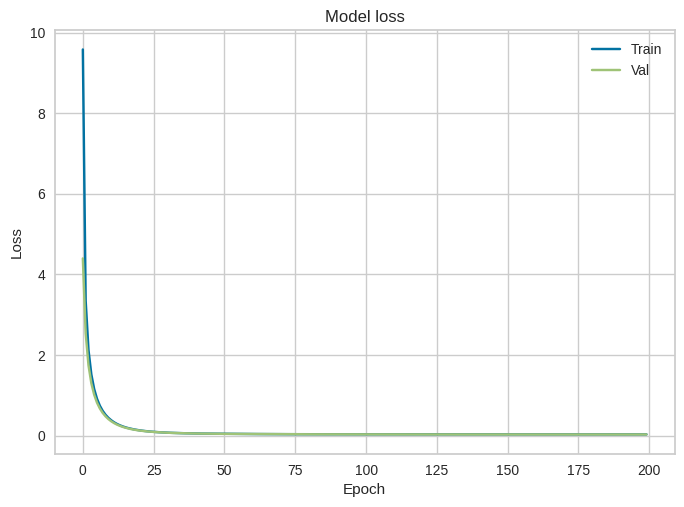

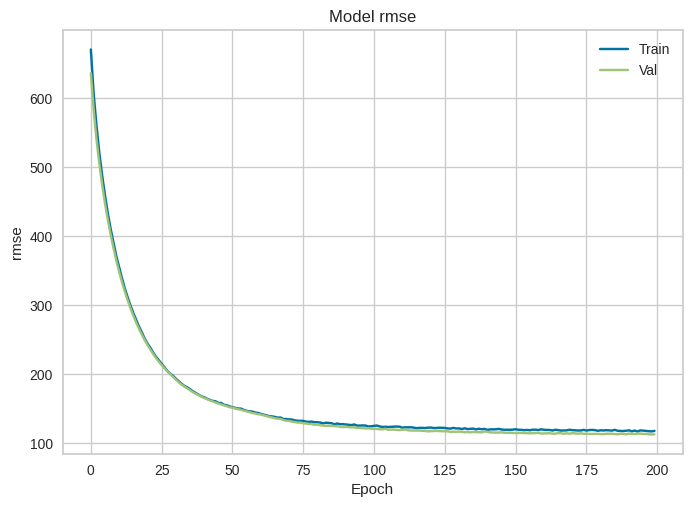

In [117]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history_model.history['rmse'])
plt.plot(history_model.history['val_rmse'])
plt.title('Model rmse')
plt.ylabel('rmse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [114]:
# Define a function to calculate Root Mean Squared Error (RMSE) and Standard Deviation (SD)
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Define the architecture of the neural network model
model = Sequential([
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=16, activation='relu'),
    BatchNormalization(),
    Dense(units=8, activation='relu'),
    BatchNormalization(),
    Dense(units=1)
])

# Compile the model with mean squared logarithmic error loss and custom metric function for RMSE and SD
model.compile(loss='mean_squared_logarithmic_error',
               optimizer=Adam(learning_rate=0.01),
              metrics=[rmse]
              )


# Train the model
history_model = model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=200,
                          batch_size=64,
                          callbacks=[ModelCheckpoint(filepath='model.h5', save_best_only=True)]
                          )

# Load the best model saved during training
model = load_model('model.h5', custom_objects={'rmse': rmse})

# Evaluate the model on the test set
loss, rmse_score = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test RMSE: {rmse_score:.4f}")


Epoch 1/200
78/78 [==============================] - 4s 10ms/step - loss: 28.2600 - rmse: 710.1846 - val_loss: 13.0913 - val_rmse: 694.2064
Epoch 2/200
78/78 [==============================] - 0s 6ms/step - loss: 17.5457 - rmse: 703.5547 - val_loss: 12.0369 - val_rmse: 672.6735
Epoch 3/200
78/78 [==============================] - 0s 5ms/step - loss: 14.3992 - rmse: 693.6098 - val_loss: 12.0712 - val_rmse: 672.4554
Epoch 4/200
78/78 [==============================] - 0s 6ms/step - loss: 12.7966 - rmse: 684.0107 - val_loss: 11.5971 - val_rmse: 667.5762
Epoch 5/200
78/78 [==============================] - 0s 6ms/step - loss: 11.7556 - rmse: 674.9894 - val_loss: 10.9941 - val_rmse: 664.6436
Epoch 6/200
78/78 [==============================] - 0s 6ms/step - loss: 8.5196 - rmse: 660.4813 - val_loss: 5.9683 - val_rmse: 631.2819
Epoch 7/200
78/78 [==============================] - 0s 5ms/step - loss: 5.5512 - rmse: 645.0941 - val_loss: 3.5036 - val_rmse: 611.0786
Epoch 8/200
78/78 [===========

In [ ]:
''' We see that there's a slight improvement in the outcome using a neural network.
This might be an indication that further significant improvement of model metrics isn't possible.
Further investigation might require different attribute combinations or enriching input with more records or records with more features. '''